In [2]:
import re
import unicodedata
import nltk
import numpy as np
from collections import Counter
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
text = ""
with open('texts.txt', 'r', encoding='utf-8') as file:
    text = file.read()
sentences = re.split(r'[.!?]', text)
# Eliminăm propozițiile goale
sentences = [s.strip() for s in sentences if s.strip()]  
print("Numarul de propozitii:", len(sentences))

Numarul de propozitii: 10


In [4]:
words = re.findall(r'\b\w+\b', text)
print("Numarul de cuvinte:",len(words))

unique_words = set(words)
print("Numarul de cuvinte unice:", len(unique_words))

Numarul de cuvinte: 160
Numarul de cuvinte unice: 97


In [5]:
# 4. Cel mai scurt și cel mai lung cuvânt
shortest_word = min(words, key=len)
longest_word = max(words, key=len)

print("Cel mai scurt cuvant:", shortest_word)
print("Cel mai lung cuvant:", longest_word)

Cel mai scurt cuvant: o
Cel mai lung cuvant: Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm


In [6]:
def remove_diacritics(text):
    return ''.join((c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn'))

text_fara_diacritice = remove_diacritics(text)

print("Text fara diacritice:\n", text_fara_diacritice)

Text fara diacritice:
 Mesaj de informare: 
Cursul si laboratoarele de Inteligenta Artificiala vor fi o 
provocare pentru toti. Suntem convinsi ca veti realiza proiecte 
foarte interesante. Va incurajam sa adresati intrebari atunci 
cand ceva nu e clar, atat in mod live, cat si folosind platforma 
Teams, canalul ”general”. 
Daca ati citit pana aici, va rugam sa lasati un mesaj pe canalul 
general cu textul ”Confiiiiiiiiiiiiiiiiiiiiiiiiiiiirm ca am citit 
textul pentru problema 3 din lab2”. 
--
Mesaj de informare generat de ChatGPT:
Stimati cursanti,
Suntem incantati sa va avem in echipa noastra pentru Cursul si 
laboratoarele de Inteligenta Artificiala. Aceasta experienta va 
fi o adevarata provocare, dar suntem convinsi ca veti realiza 
proiecte extrem de interesante.
Va incurajam sa fiti activi si sa adresati intrebari atunci cand 
ceva nu este clar. Fie ca este vorba de o discutie in timp real 
sau prin intermediul platformei Teams, canalul ”general”, suntem 
aici sa va sprijinim.
S

In [7]:
def get_synonyms(word):
    synonyms = set()
    
    # Căutăm sinonime în limba română (ron)
    for syn in wordnet.synsets(word, lang='ron'):
        for lemma in syn.lemmas('ron'):
            synonyms.add(lemma.name())
    
    return synonyms
    

sinonim = get_synonyms('Confirm')
print(sinonim)

set()


[103, 60, 133, 167, 164, 116, 83, 132, 32, 50]


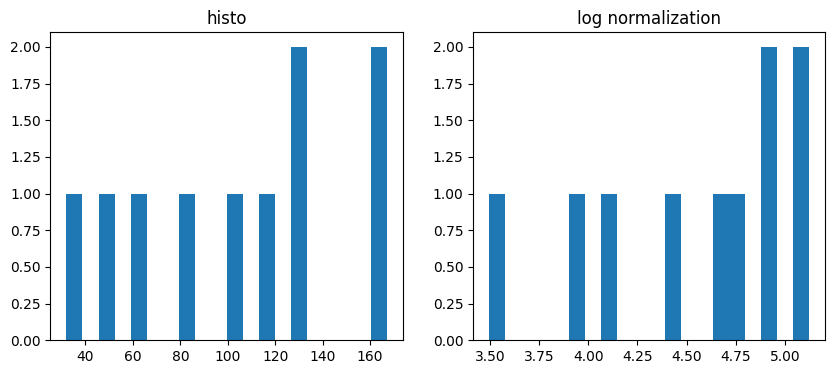

In [8]:
numar_cuvinte_propozitii = [len(sentence) for sentence in sentences]
print(numar_cuvinte_propozitii)
minim = min(numar_cuvinte_propozitii)
maxim = max(numar_cuvinte_propozitii)
mean = np.mean(numar_cuvinte_propozitii)

cuvinte_propozitii_scaled_log = [np.log(p + 1) for p in numar_cuvinte_propozitii]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.hist(numar_cuvinte_propozitii, 20)
ax1.set_title('histo')
ax2.hist(cuvinte_propozitii_scaled_log, 20)
ax2.set_title("log normalization")
plt.show()